In [1]:
 from sympy import *
init_printing()

In [2]:
x = Symbol('x')
EI = Symbol('EI')
R = Symbol('R')
omega = Symbol('omega')
ll = Symbol('lambda')

In [3]:
gamma_1 = x

In [4]:
gamma_2 = 10*x**3/3 - 10*x**4/3 + x**5

In [5]:
A11 = integrate(gamma_1*gamma_1, (x, 0, 1))

In [6]:
A12 = integrate(gamma_1*gamma_2, (x, 0, 1))

In [7]:
A12

In [8]:
A22 = integrate(gamma_2*gamma_2, (x, 0, 1))

In [9]:
G = integrate(omega**2*x, (x,x*R, R))

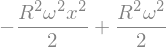

In [10]:
G

In [11]:
def calcB(gamma_1, gamma_2):
    der1_2 = diff(gamma_1,x,2)
    der1_1 = diff(gamma_1,x,1)
    der2_1 = diff(gamma_2,x,1)
    der2_2 = diff(gamma_2,x,2)
    integrando = EI*der1_2*der2_2+R**2*G*der1_1*der2_1
    sol = integrate(integrando,(x, 0, 1))/(2*R)/(omega**2*R**3)
    return(sol*2)

In [12]:
B11 = calcB(gamma_1, gamma_1)

In [13]:
B12 = calcB(gamma_1, gamma_2)

In [14]:
B22 = calcB(gamma_2, gamma_2).simplify()

In [15]:
k = Symbol('k')

In [16]:
B22 = B22.subs(EI,k*R**4*omega**2)

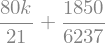

In [17]:
B22

In [18]:
LHS =  Matrix([[B11, B12], [B12, B22]])- ll**2*Matrix([[A11, A12], [A12, A22]])

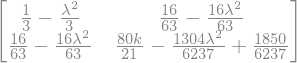

In [19]:
LHS

In [20]:
determinante = det(LHS).subs(k,0.004).simplify()

In [21]:
factor(determinante)

In [22]:
soluciones = roots(determinante)

In [23]:
sol = list(soluciones.keys());

In [24]:
sol

In [25]:
phi_1 = Symbol('phi_1')
phi_2 = Symbol('phi_2')

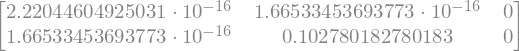

In [26]:
Sistema = LHS.subs(k,0.004).subs(ll, sol[2])
Sistema = Sistema.col_insert(2, Matrix([0, 0]))
solve_linear_system(Sistema, phi_1, phi_2)
Sistema

In [27]:
Modo1 = gamma_1

In [28]:
Sistema = LHS.subs(k,0.004).subs(ll, sol[3])
Sistema = Sistema.col_insert(2, Matrix([0, 0]))
solve_linear_system(Sistema, phi_1, phi_2)

In [29]:
Modo2 = -0.76*gamma_1+gamma_2
Modo2 = Modo2/Modo2.subs(x,1.0)

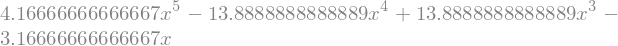

In [30]:
Modo2

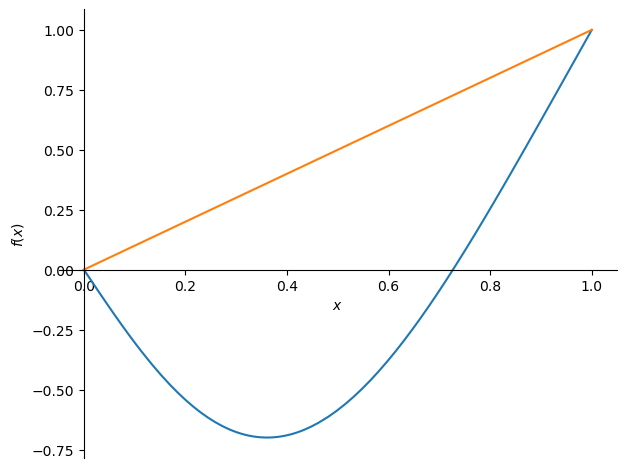

In [31]:
p1 = plot(Modo2,Modo1,(x, 0, 1))